In [63]:
%load_ext autoreload
%autoreload 2

import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from src.classes import *

import seaborn as sns
sns.set(style="whitegrid", palette="deep", color_codes=True)

# Colors
Scol = "#07D5E6"
Ecol = "#FFD700"
Icol = "#FB9214"
Rcol = "#3B7548"
Dcol = "#EA1313"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
np.random.seed(1)
incubation_process = ss.beta(a=2,b=2,loc=1,scale=0.1)
recovery_process = ss.erlang(10)
death_process = ss.erlang(10)

es = Covid_SEIRD(
    0.7,
    incubation_process,
    recovery_process,
    death_process,
    population=3700, 
    init_exposed=1,
    prob_dead=0.03,
    beta_change=16,
    new_beta=0.1
)

history = [(time, S, E, I, R, D) for __, time, (S, E, I, R, D) in es.run_until(40)]
time, S, E, I, R, D = zip(*history)

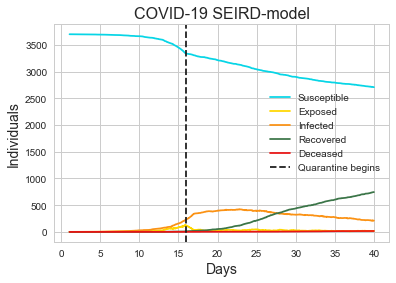

In [65]:
plt.plot(time, S, label = "Susceptible", color = Scol)
plt.plot(time, E, label = "Exposed", color = Ecol)
plt.plot(time, I, label = "Infected", color = Icol)
plt.plot(time, R, label = "Recovered", color = Rcol)
plt.plot(time, D, label = "Deceased", color = Dcol)

plt.axvline(x=16, c = "k", ls = "--", label = "Quarantine begins")
  
plt.legend(loc = 'center right')
plt.xlabel("Days", fontsize = 14)
plt.ylabel("Individuals", fontsize = 14)
plt.title(r'COVID-19 SEIRD-model', fontsize = 16)
plt.show()

In [66]:
D[-1:]

(17,)

In [73]:
np.random.seed(1)
es = Covid_SEIRD(
    0.7,
    incubation_process,
    recovery_process,
    death_process,
    population=3700, 
    init_exposed=1,
    prob_dead=0.03,
    beta_change=16,
    new_beta=0.7
)

history = [(time, S, E, I, R, D) for __, time, (S, E, I, R, D) in es.run_until(40)]
time, S, E, I, R, D = zip(*history)

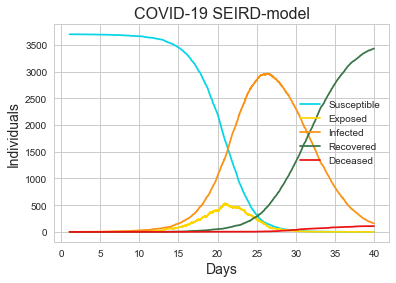

In [74]:
plt.plot(time, S, label = "Susceptible", color = Scol)
plt.plot(time, E, label = "Exposed", color = Ecol)
plt.plot(time, I, label = "Infected", color = Icol)
plt.plot(time, R, label = "Recovered", color = Rcol)
plt.plot(time, D, label = "Deceased", color = Dcol)

plt.legend(loc = 'center right')
plt.xlabel("Days", fontsize = 14)
plt.ylabel("Individuals", fontsize = 14)
plt.title(r'COVID-19 SEIRD-model', fontsize = 16)
plt.show()

In [28]:
D[-1:]

(140,)

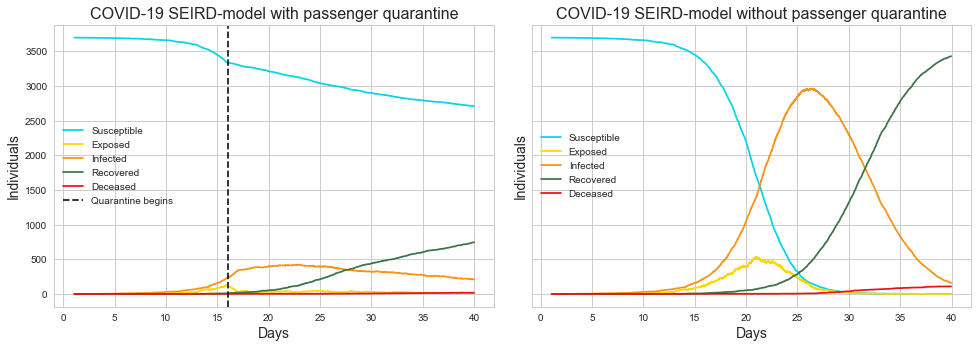

In [86]:
fig = plt.subplots(nrows=1, ncols=2,figsize = (14, 5), sharex=True, sharey=True)

beta_list = [0.1, 0.7]

i = 0

for beta in beta_list:
        np.random.seed(1)
        es = Covid_SEIRD(
        0.7,
        incubation_process,
        recovery_process,
        death_process,
        population=3700, 
        init_exposed=1,
        prob_dead=0.03,
        beta_change=16,
        new_beta=beta_list[i]
        )


        history = [(time, S, E, I, R, D) for __, time, (S, E, I, R, D) in es.run_until(40)]
        time, S, E, I, R, D = zip(*history)
        
        plt.sca(fig[0].axes[i])
        plt.plot(time, S, label = "Susceptible", color = Scol)
        plt.plot(time, E, label = "Exposed", color = Ecol)
        plt.plot(time, I, label = "Infected", color = Icol)
        plt.plot(time, R, label = "Recovered", color = Rcol)
        plt.plot(time, D, label = "Deceased", color = Dcol)

        
        plt.xlabel("Days", fontsize = 14)
        plt.ylabel("Individuals", fontsize = 14)
        
        if i==0:
            plt.axvline(x=16, c = "k", ls = "--", label = "Quarantine begins")
            plt.title(r'COVID-19 SEIRD-model with passenger quarantine', fontsize = 16)
            
        else:
            plt.title(r'COVID-19 SEIRD-model without passenger quarantine', fontsize = 16)
        
        plt.legend(loc = 'center left')
            

        i += 1

plt.tight_layout()    
#plt.savefig('../reports/figures/COVID-model.eps', format='eps')
plt.show()
